# Realtime Yahoo Finance Dataset

In [1]:
!pip install yfinance

In [2]:
!pip install keras

In [3]:
!pip install tensorflow

In [4]:
!pip install pandas_datareader

## Importing necessary modules

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from keras.models import Sequential
from keras.layers import Dense, LSTM

import warnings
warnings.filterwarnings('ignore')

## Collecting Historical Data of "S&P BSE SENSEX" Stock from yFinance

In [6]:
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

df=pdr.get_data_yahoo("%5EBSESN", start="2011-01-01", end="2021-08-03")

[*********************100%***********************]  1 of 1 completed


In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,20621.609375,20664.800781,20531.000000,20561.050781,20561.050781,12000
2011-01-04,20617.380859,20651.210938,20449.009766,20498.720703,20498.720703,15200
2011-01-05,20509.949219,20509.949219,20243.949219,20301.099609,20301.099609,14400
2011-01-06,20395.500000,20425.849609,20107.169922,20184.740234,20184.740234,16600
2011-01-07,20163.849609,20210.619141,19629.220703,19691.810547,19691.810547,15800


In [8]:
df.shape

(2594, 6)

## Graph for Closing Price v/s Year

Text(0.5, 1.0, 'Stock Grpah of S&P BSE SENSEX')

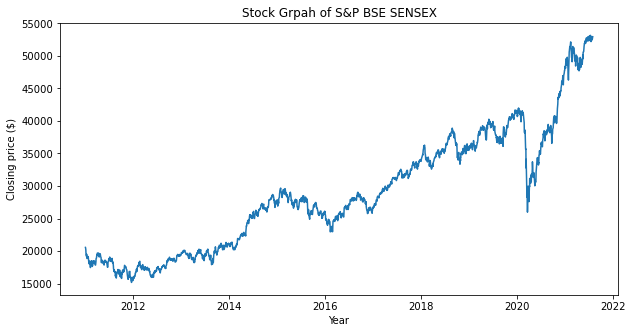

In [9]:
plt.figure(1,(10,5))
graph=plt.plot(df['Close'])
plt.xlabel("Year")
plt.ylabel("Closing price ($)")
plt.title("Stock Grpah of S&P BSE SENSEX")

## Data Preprocessing by scalling it

In [10]:
data=df.filter(['Close'])
df_new=data.values
df_new

array([[20561.05078125],
       [20498.72070312],
       [20301.09960938],
       ...,
       [52653.0703125 ],
       [52586.83984375],
       [52950.62890625]])

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler=MinMaxScaler(feature_range=(0,1), copy=True)
scaled_data=scaler.fit_transform(df_new)
scaled_data

array([[0.14179663],
       [0.14015566],
       [0.13495288],
       ...,
       [0.98668428],
       [0.98494063],
       [0.99451812]])

## Splitting dataset into train and test

In [13]:
train_len=math.ceil(len(df_new)*0.8)
test_len=len(data)-train_len
print("train_len=",train_len)
print("test_len=",test_len)

train_len= 2076
test_len= 518


In [14]:
train_data = scaled_data[0:train_len,:]

In [15]:
train_data.shape

(2076, 1)

In [16]:
test_data=scaled_data[train_len-60:,:]

In [17]:
test_data.shape

(578, 1)

## Training model for 60 days and predicting for 61st day

In [18]:
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print("x_train",x_train)
        print("y_train",y_train)
        print()

x_train [array([0.14179663, 0.14015566, 0.13495288, 0.13188949, 0.11891211,
       0.10659918, 0.10586784, 0.11476005, 0.10551191, 0.09702458,
       0.09759878, 0.10312222, 0.10012803, 0.10192403, 0.10089702,
       0.10468153, 0.09989448, 0.09239076, 0.08479649, 0.0830007 ,
       0.07495676, 0.07675749, 0.08620077, 0.07458634, 0.07535085,
       0.06846659, 0.06365059, 0.06023517, 0.06722685, 0.07969507,
       0.08158012, 0.08229357, 0.08771483, 0.07994044, 0.08591118,
       0.08216878, 0.07906666, 0.06469421, 0.06649761, 0.06972242,
       0.08612678, 0.08726568, 0.08717852, 0.080234  , 0.08594645,
       0.08674413, 0.08300651, 0.07895503, 0.08594198, 0.07878524,
       0.08381499, 0.07831737, 0.0711812 , 0.07013444, 0.07406375,
       0.07979934, 0.08360571, 0.09584516, 0.09920185, 0.10387912])]
y_train [0.10833836263646929]



In [19]:
type(x_train)

list

In [20]:
type(y_train)

list

In [21]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2016, 60, 1)

In [22]:
X_test=[]
y_test=df_new[train_len:,:]
for i in range(60,len(test_data)):
  X_test.append(test_data[i-60:i,0])

In [23]:
type(X_test)

list

In [24]:
type(y_test)

numpy.ndarray

In [25]:
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(518, 60, 1)

## LSTM Model

In [26]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [30]:
model.fit(x_train,y_train,batch_size=1,epochs=5)

Epoch 1/5
2016/2016 [==============================] - 101s 46ms/step - loss: 5.6969e-04
Epoch 2/5
2016/2016 [==============================] - 91s 45ms/step - loss: 2.3704e-04
Epoch 3/5
2016/2016 [==============================] - 90s 45ms/step - loss: 2.1655e-04
Epoch 4/5
2016/2016 [==============================] - 89s 44ms/step - loss: 1.4623e-04
Epoch 5/5
2016/2016 [==============================] - 93s 46ms/step - loss: 1.2104e-04


## Predictions

In [31]:
y_pred=model.predict(X_test)
y_pred=scaler.inverse_transform(y_pred)

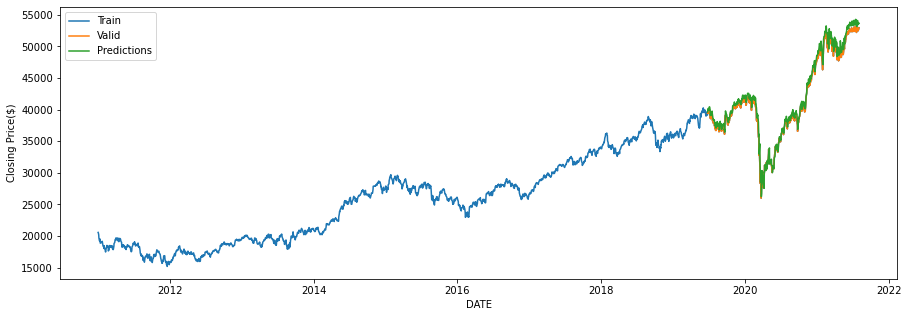

In [32]:
train=data[:train_len]
validation=data[train_len:]
validation['Predictions']=y_pred
plt.figure(figsize=(15,5))
plt.xlabel("DATE")
plt.ylabel("Closing Price($)")
plt.plot(df['Close'])
plt.plot(validation[['Close','Predictions']])
plt.legend(['Train','Valid','Predictions'])
plt.show()

## Testing our model to find closing price for"4th August 2021"

In [33]:
last_60_days=data[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price=model.predict(X_test)
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[54108.688]]


In [35]:
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

sample = pdr.get_data_yahoo("%5EBSESN", start="2021-08-04", end="2021-08-05")

[*********************100%***********************]  1 of 1 completed


In [36]:
sample

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-04,54071.21875,54465.910156,54034.308594,54369.769531,54369.769531,14600


## Sentiment Analysis

### Gathering Dataset

In [40]:
df_sentiment = pd.read_csv("C:/Users/hp/OneDrive/Documents/GitHub/AI PROJECT/india-news-headlines.csv")

In [41]:
df_sentiment.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


## Importing Necessary Modules

In [42]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...


True

## Predicting if a news headline is positive , negative or neutral

In [48]:
vader = SentimentIntensityAnalyzer()

sentiment = df_sentiment['headline_text'].apply(vader.polarity_scores).tolist()
sentiment_score = pd.DataFrame(sentiment)

df_sentiment = df_sentiment.join(sentiment_score, rsuffix='_right')


df_sentiment.head()

,publish_date,headline_category,headline_text,neg,neu,pos,compound,neg_right,neu_right,pos_right,...,pos_right,compound_right,neg_right,neu_right,pos_right,compound_right,neg_right,neu_right,pos_right,compound_right
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,0.000,0.805,0.195,0.2924,0.000,0.805,0.195,...,0.195,0.2924,0.000,0.805,0.195,0.2924,0.000,0.805,0.195,0.2924
1,20010102,unknown,Fissures in Hurriyat over Pak visit,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,...,0.000,0.0000,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000
2,20010102,unknown,America's unwanted heading for India?,0.322,0.678,0.000,-0.2263,0.322,0.678,0.000,...,0.000,-0.2263,0.322,0.678,0.000,-0.2263,0.322,0.678,0.000,-0.2263
3,20010102,unknown,For bigwigs; it is destination Goa,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,...,0.000,0.0000,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000
4,20010102,unknown,Extra buses to clear tourist traffic,0.000,0.658,0.342,0.3818,0.000,0.658,0.342,...,0.342,0.3818,0.000,0.658,0.342,0.3818,0.000,0.658,0.342,0.3818
